<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Size             500 non-null    int64  
 1   Location         500 non-null    object 
 2   Number of Rooms  500 non-null    int64  
 3   Price            500 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 15.8+ KB
None
              Size  Number of Rooms         Price
count   500.000000        500.00000  5.000000e+02
mean   2989.916000          2.94800  5.479000e+05
std    1184.261381          1.43297  2.084649e+05
min     804.000000          1.00000  1.470000e+05
25%    1953.000000          2.00000  3.827500e+05
50%    3046.000000          3.00000  5.200000e+05
75%    3993.750000          4.00000  7.000000e+05
max    4999.000000          5.00000  1.082000e+06
Missing values:
 Size               0
Location           0
Number of Rooms    0
Price              0
d

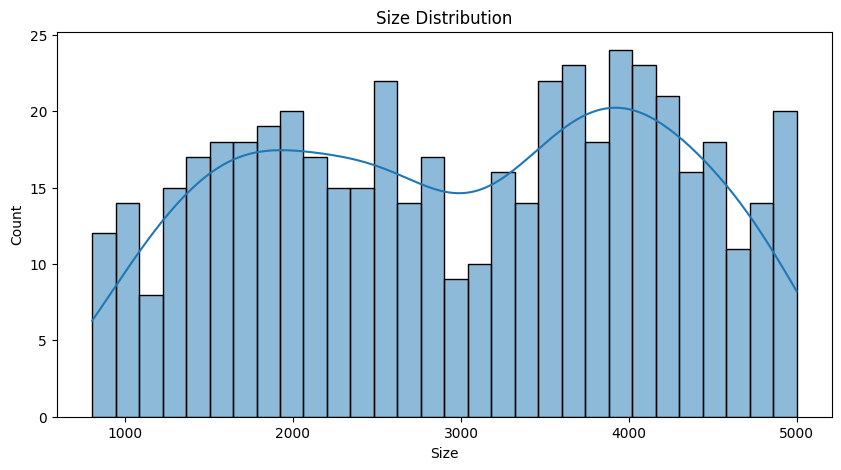

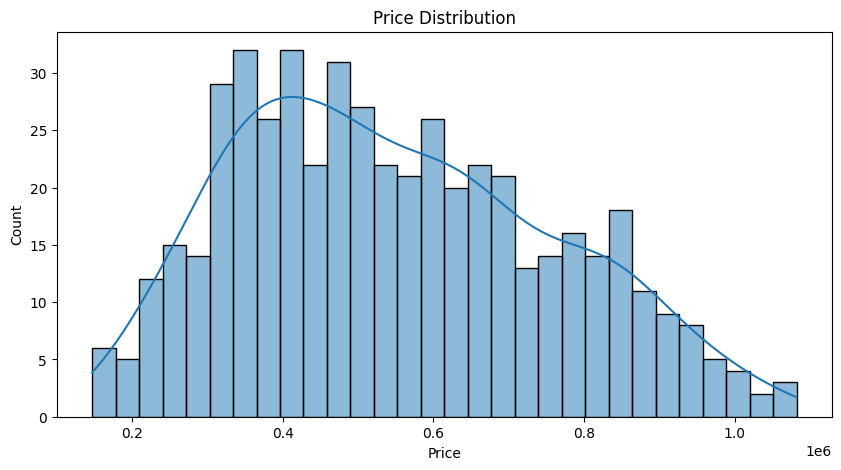

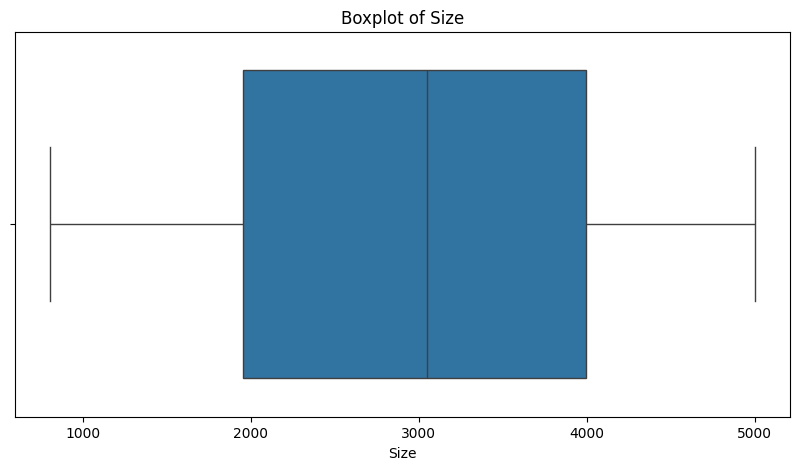

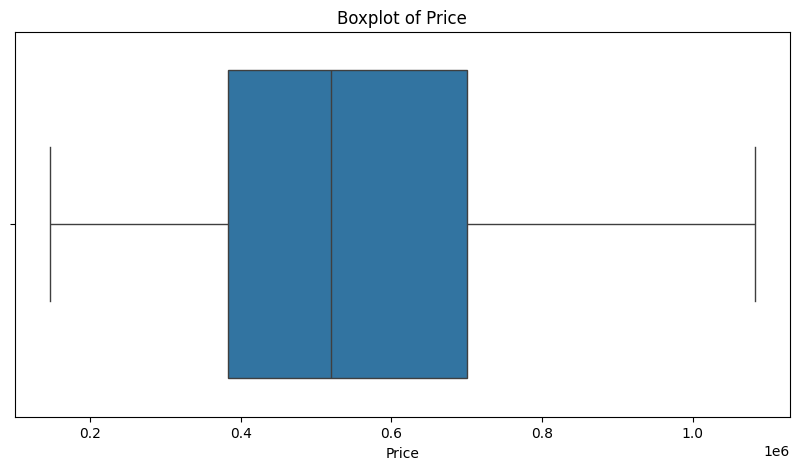

Correlation Matrix:
                        Size  Number of Rooms     Price  Location_suburban  \
Size               1.000000        -0.010507  0.825197           0.006975   
Number of Rooms   -0.010507         1.000000  0.086342           0.022762   
Price              0.825197         0.086342  1.000000          -0.006094   
Location_suburban  0.006975         0.022762 -0.006094           1.000000   
Location_urban     0.007203        -0.046787  0.461883          -0.517371   

                   Location_urban  
Size                     0.007203  
Number of Rooms         -0.046787  
Price                    0.461883  
Location_suburban       -0.517371  
Location_urban           1.000000  
Low-impact predictors: ['Number of Rooms', 'Location_suburban']
RMSE: 69897.7174769727
R^2 Score: 0.8927707377330195


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("house_prices.csv")


print(df.info())
print(df.describe())
print("Missing values:\n", df.isnull().sum())

## analysing distributions 
plt.figure(figsize=(10, 5))
sns.histplot(df['Size'], kde=True, bins=30)
plt.title("Size Distribution")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title("Price Distribution")
plt.show()

# Identifying  outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Size'])
plt.title("Boxplot of Size")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Price'])
plt.title("Boxplot of Price")
plt.show()

# Feature Scaling
scaler = StandardScaler()
df[['Size', 'Number of Rooms']] = scaler.fit_transform(df[['Size', 'Number of Rooms']])

# Encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_locations = encoder.fit_transform(df[['Location']])
encoded_location_df = pd.DataFrame(encoded_locations, columns=encoder.get_feature_names_out(['Location']))

df = pd.concat([df.drop(columns=['Location']), encoded_location_df], axis=1)

# Feature Selection
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix)
low_impact_features = correlation_matrix["Price"][abs(correlation_matrix["Price"]) < 0.1].index.tolist()
print("Low-impact predictors:", low_impact_features)
df_cleaned = df.drop(columns=low_impact_features)


# Train-Test Split
X = df_cleaned.drop(columns=['Price'])
y = df_cleaned['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")

